In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.head(5)
print(train.shape[0], 'rows and',train.shape[1],'cols')
print(test.shape[0], 'rows and',test.shape[1],'cols')
train.head(5)
print(train.columns)

1460 rows and 81 cols
1459 rows and 80 cols
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'G

In [4]:
# save Id columns and dropping them from the dataframes

train_ID = train['Id']
test_ID  = test['Id']

train.drop("Id", axis =1, inplace = True)
test.drop("Id", axis =1 , inplace = True)


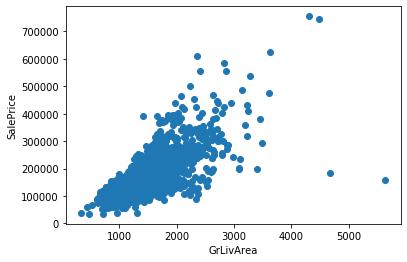

In [5]:
# Data Preprocessing 
# outliers 

fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

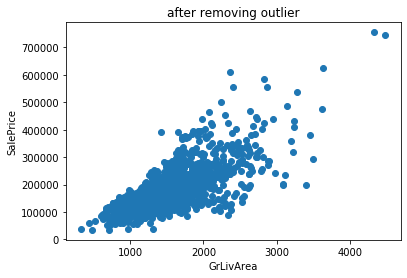

In [6]:
# handling the outliers

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('after removing outlier')
plt.show()
                   

                   

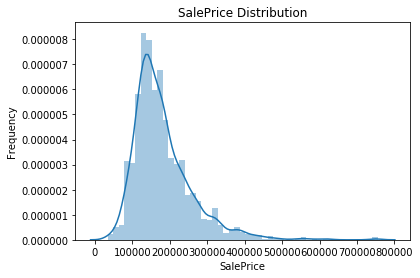

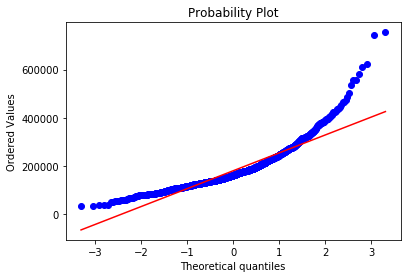

Skewness: 1.8812964895244009
Kurtosis: 6.523066888485879


In [7]:
# Target Variable exploration

sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'] , plot =plt)
plt.show()

# Skewness and Kurtosis

print('Skewness:', train['SalePrice'].skew())
print('Kurtosis:', train['SalePrice'].kurt())

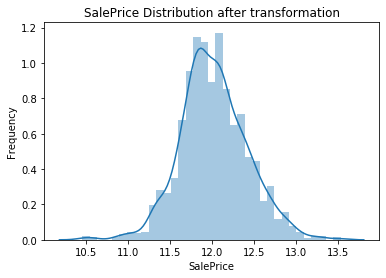

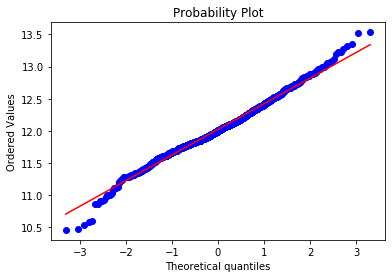

Skewness: 0.12157976050304882
Kurtosis: 0.8047507917418972


In [8]:
# the salesprice is positively skewed. Will take log transform to transform the train 

train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution after transformation')

fig = plt.figure()
res = stats.probplot(train['SalePrice'] , plot =plt)
plt.show()

# Skewness and Kurtosis

print('Skewness:', train['SalePrice'].skew())
print('Kurtosis:', train['SalePrice'].kurt())

In [10]:
#y_train = train.SalePrice.values

In [38]:
# Feature Engineering 
dataset = pd.concat((train,test)).reset_index(drop = True)
dataset.drop(['SalePrice'], axis = 1, inplace = True)
dataset.shape
ntrain = train.shape[0]
ntest = test.shape[0]


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [19]:
# Missing data

dataset_na = (dataset.isnull().sum() / len(dataset))*100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending = False)[:20]
dataset_missing = pd.DataFrame({'Missing data Ratio' :dataset_na})
dataset_missing.head(20)

,Missing data Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


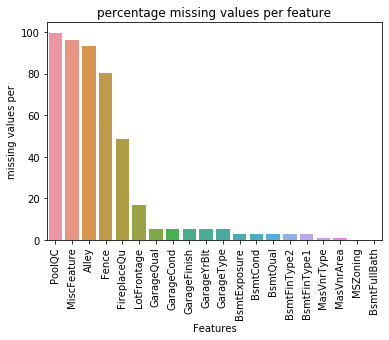

In [20]:
fig , ax = plt.subplots()
plt.xticks(rotation = '90')
sns.barplot(x = dataset_na.index, y= dataset_na)
plt.xlabel('Features')
plt.ylabel('missing values per')
plt.title('percentage missing values per feature')
plt.show()

In [21]:
# imputing missing values
dataset['PoolQC'] = dataset['PoolQC'].fillna('None')
dataset["MiscFeature"] = dataset["MiscFeature"].fillna("None")
dataset["Alley"] = dataset["Alley"].fillna("None")
dataset["Fence"] = dataset["Fence"].fillna("None")
dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("None")

In [22]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')
    
dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])


dataset['Utilities'] = dataset.drop(['Utilities'],axis =1)

dataset["Functional"] = dataset["Functional"].fillna("Typ")
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['MSSubClass'] = dataset['MSSubClass'].fillna("None")
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

In [23]:
# checking if any missing value is present 

dataset_na = (dataset.isnull().sum() / len(dataset))*100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending = False)[:20]
dataset_missing = pd.DataFrame({'Missing data Ratio' :dataset_na})
dataset_missing.head(20)

,Missing data Ratio


In [24]:

# changing Numerical values to the categorical 
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)
dataset['OverallCond'] = dataset['OverallCond'].astype(str)
                                        

In [25]:
from sklearn.preprocessing import LabelEncoder


cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    encoder = LabelEncoder()
    encoder.fit(list(dataset[col].values))
    dataset[col] = encoder.transform(list(dataset[col].values))

# Adding extra feature

dataset['totalArea'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']


    

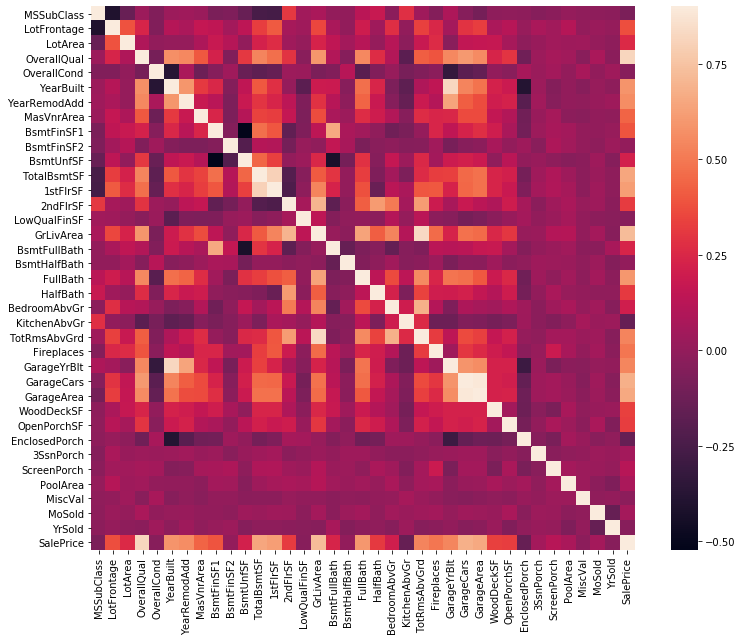

In [26]:
# Data Correaltion between all the features and target variable

correlations = train.corr()
plt.subplots(figsize = (13,10))
sns.heatmap(correlations,vmax = 0.9, square= True)


In [27]:
(train.corr()**2)['SalePrice'].sort_values(ascending = False)[:15]

SalePrice       1.000000
OverallQual     0.674706
GrLivArea       0.525931
GarageCars      0.463806
GarageArea      0.430505
TotalBsmtSF     0.419338
1stFlrSF        0.385020
FullBath        0.355096
YearBuilt       0.344619
YearRemodAdd    0.320347
GarageYrBlt     0.293371
TotRmsAbvGrd    0.289123
Fireplaces      0.242062
MasVnrArea      0.188895
BsmtFinSF1      0.153886
Name: SalePrice, dtype: float64

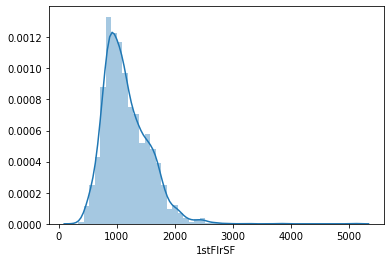

In [28]:
sns.distplot(dataset['1stFlrSF'])

In [29]:
neumerical_features = dataset.dtypes[dataset.dtypes != 'object'].index
skewed_features     = dataset[neumerical_features].apply(lambda x:skew(x)).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [30]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [31]:
dataset = dataset.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
dataset.shape

(2917, 77)

In [33]:
# feture engineering a new feature "TotalFS"
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset['YrBltAndRemod']=dataset['YearBuilt']+dataset['YearRemodAdd']

dataset['Total_sqr_footage'] = (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] +
                                 dataset['1stFlrSF'] + dataset['2ndFlrSF'])

dataset['Total_Bathrooms'] = (dataset['FullBath'] + (0.5 * dataset['HalfBath']) +
                               dataset['BsmtFullBath'] + (0.5 * dataset['BsmtHalfBath']))

dataset['Total_porch_sf'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] +
                              dataset['EnclosedPorch'] + dataset['ScreenPorch'] +
                            
                              dataset['WoodDeckSF'])

In [34]:
dataset['haspool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
dataset['has2ndfloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['hasgarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
dataset['hasbsmt'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['hasfireplace'] = dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [35]:
dataset.shape

(2917, 87)

In [36]:
## Creating dummy variable 
final_features = pd.get_dummies(dataset).reset_index(drop=True)
final_features.shape

(2917, 228)

In [49]:
y = train.SalePrice.values
X = final_features[:ntrain]
print(X.shape, '&', y.shape )

(1458, 228) & (1458,)


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1166, 228)
(292, 228)
(1166,)
(292,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

lin_reg = LinearRegression(normalize= True, n_jobs= -1)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print ('%.2f'%mean_squared_error(y_test, y_pred))


70377860381074691981312.00
